In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import calendar
from datetime import datetime

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = '/content/drive/MyDrive/Colab_Notebooks/bike_share/train.csv'
test_dir = '/content/drive/MyDrive/Colab_Notebooks/bike_share/test.csv'

train = pd.read_csv(train_dir)
test = pd.read_csv(test_dir)

In [ ]:
train = pd.concat([train,test],axis=0)

In [ ]:
train['datetime']=pd.to_datetime(train['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  count       10886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 1.7 MB


In [ ]:
#year,momth,day,houe,minute,second
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012,12,31,19,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012,12,31,20,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012,12,31,21,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012,12,31,22,0,0


In [ ]:
train = train.drop(['datetime'],axis=1)

In [ ]:
train = train.drop(['day'],axis=1)

In [ ]:
train = train.drop(['minute','second'],axis=1)

In [ ]:
train = train.drop(['atemp'],axis=1)

In [ ]:
train = train.drop(['month'],axis=1)

In [ ]:
train = train.drop(['registered','casual'],axis=1)

In [ ]:
train = train.drop(['windspeed'],axis=1)

<Axes: >

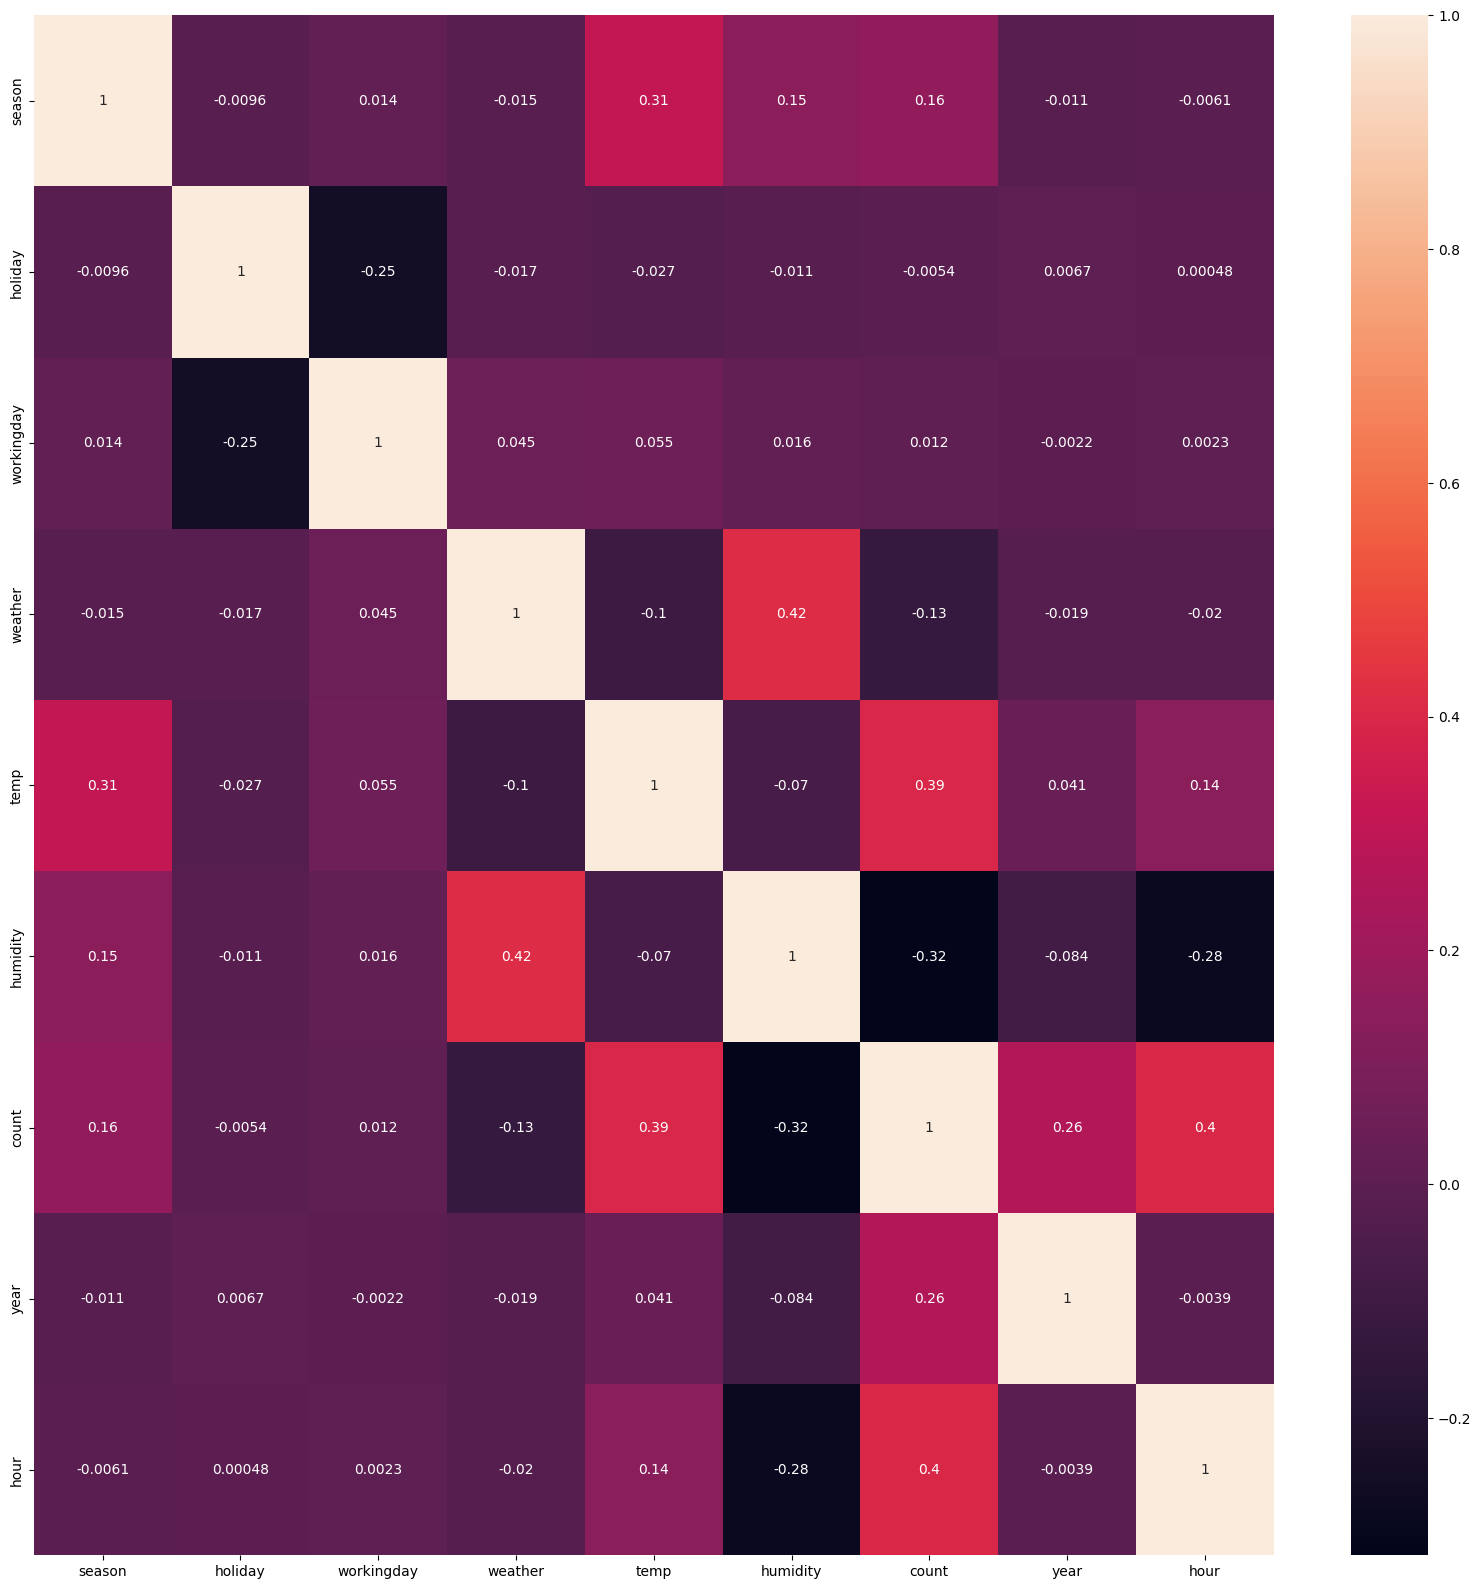

In [ ]:
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

scaler = MinMaxScaler()
scaler.fit(train[['temp','humidity','hour','year']])
transform = scaler.transform(train[['temp','humidity','hour','year']])

In [ ]:
train['temp']=transform[:,0]
train['humidity']=transform[:,1]
train['hour']=transform[:,2]
train['year']=transform[:,3]

In [ ]:
enc = OneHotEncoder()
enc=enc.fit(train[['season','weather']])
transform = enc.transform(train[['season','weather']])

In [ ]:
train['season_1']=transform.toarray()[:,0]
train['season_2']=transform.toarray()[:,1]
train['season_3']=transform.toarray()[:,2]

In [ ]:
train['weather_1']=transform.toarray()[:,3]
train['weather_2']=transform.toarray()[:,4]
train['weather_3']=transform.toarray()[:,5]

In [ ]:
train.drop(['season','weather'],axis=1,inplace=True)

In [ ]:
train.head()

,holiday,workingday,temp,humidity,count,year,hour,season_1,season_2,season_3,weather_1,weather_2,weather_3
0,0,0,0.224490,0.81,16.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0.204082,0.80,40.0,0.0,0.043478,1.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0.204082,0.80,32.0,0.0,0.086957,1.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0.224490,0.75,13.0,0.0,0.130435,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0.224490,0.75,1.0,0.0,0.173913,1.0,0.0,0.0,0.0,1.0,0.0


<Axes: xlabel='hour', ylabel='count'>

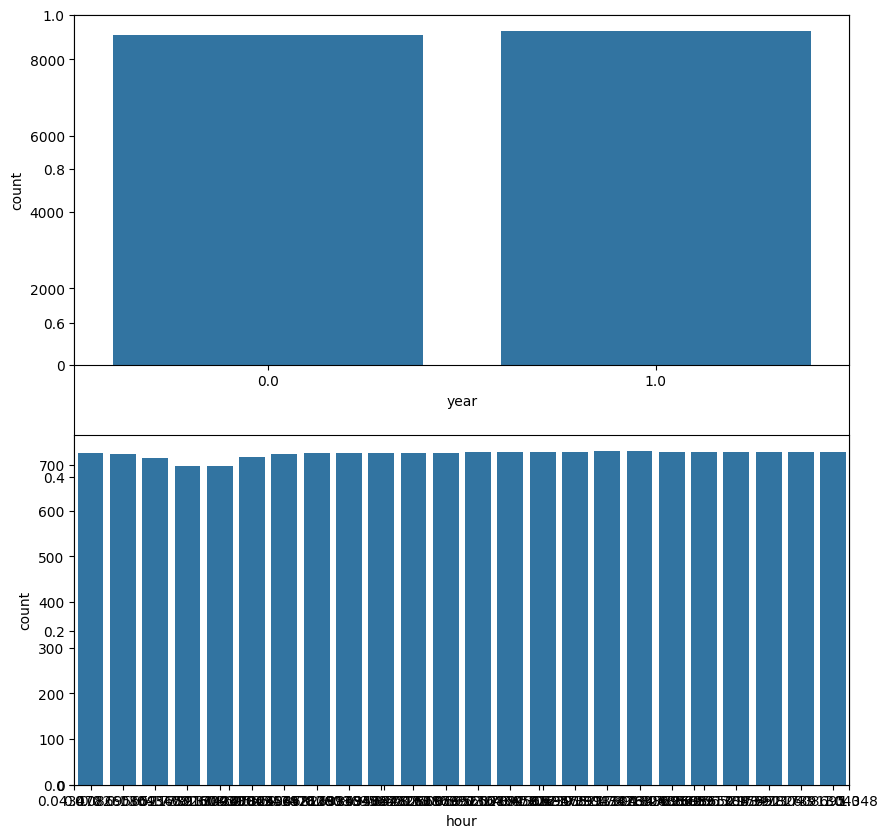

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))

plt.subplot(2,1,1)
sns.countplot(x='year',data=train)
# plt.subplot(3,2,2)
# sns.countplot(x='month',data=train,)
# plt.subplot(3,1,2)
# sns.countplot(x='day',data=train)
plt.subplot(2,1,2)
sns.countplot(x='hour',data=train)
# plt.subplot(3,2,5)
# sns.countplot(x='minute',data=train)
# plt.subplot(3,2,6)
# sns.countplot(x='second',data=train)

<Axes: ylabel='count'>

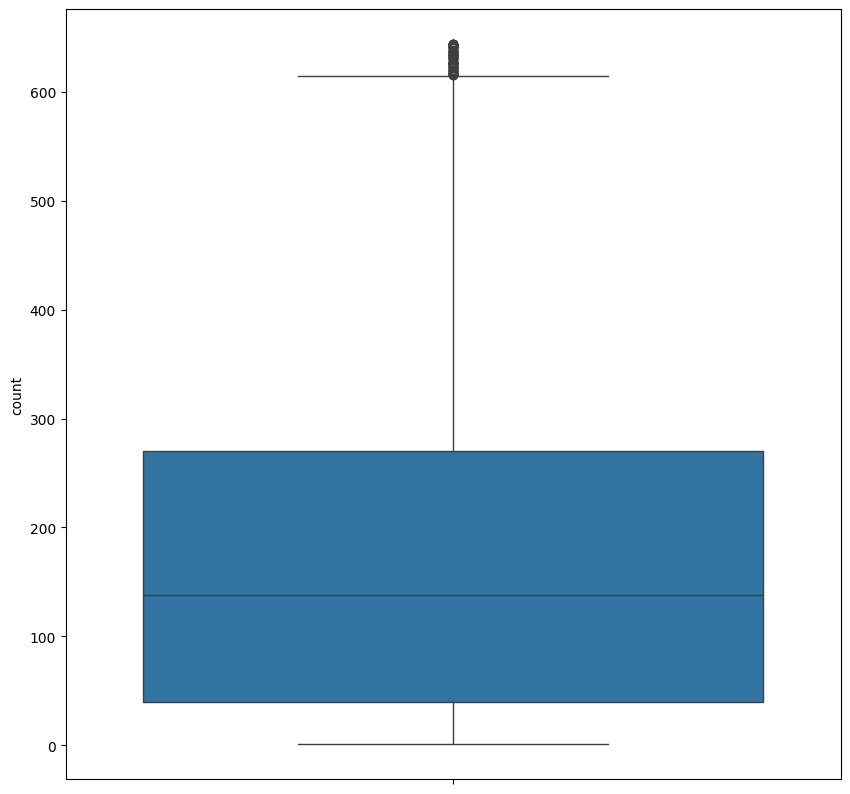

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(y='count',data=train)

In [ ]:
train=train[np.abs(train['count']-train['count'].mean())<=2.5*train['count'].std()]

In [ ]:
train.shape

(10577, 13)

In [ ]:
target = train['count']

In [ ]:
pd.isna(train).sum(), pd.isna(target).sum()

(holiday       0
 workingday    0
 temp          0
 humidity      0
 count         0
 year          0
 hour          0
 season_1      0
 season_2      0
 season_3      0
 weather_1     0
 weather_2     0
 weather_3     0
 dtype: int64,
 0)

ValueError: Could not interpret value `season` for `x`. An entry with this name does not appear in `data`.

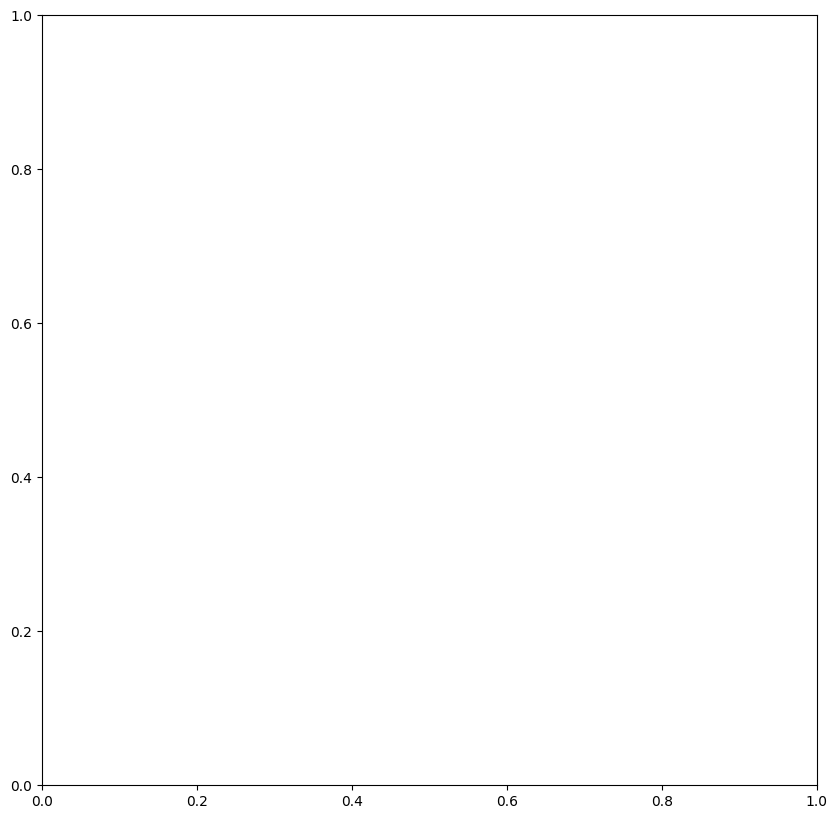

In [ ]:
# fig,ax = plt.subplots(figsize=(10,10))
# sns.barplot(x='season',y='count',data=train)

In [311]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
_,x_test,_,y_test = train_test_split(train.drop('count',axis=1),train['count'],test_size=0.2,random_state=42)

In [ ]:
x_test

,holiday,workingday,temp,humidity,year,hour,season_1,season_2,season_3,weather_1,weather_2,weather_3
1284,0,1,0.448980,0.63,0.0,0.391304,1.0,0.0,0.0,0.0,1.0,0.0
7027,0,1,0.285714,0.49,1.0,0.130435,0.0,1.0,0.0,0.0,1.0,0.0
9418,0,0,0.612245,0.41,1.0,0.826087,0.0,0.0,1.0,0.0,1.0,0.0
5333,0,1,0.367347,0.46,0.0,0.304348,0.0,0.0,0.0,1.0,0.0,1.0
1393,0,0,0.387755,0.43,0.0,0.956522,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
323,0,1,0.163265,0.55,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0
10260,1,0,0.510204,0.77,1.0,0.956522,0.0,0.0,0.0,1.0,1.0,0.0
1097,0,1,0.367347,0.00,0.0,0.347826,1.0,0.0,0.0,0.0,0.0,0.0
9586,0,1,0.693878,0.65,1.0,0.826087,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
lr = LinearRegression()
lr.fit(train.drop('count',axis=1),target)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
root_mean_squared_error(y_test,y_pred)

117.71991860167935

In [ ]:
mean_squared_error(y_test,y_pred)

13857.979235586012

In [312]:
mean_absolute_error(y_test,y_pred)

90.48499527410208

<Axes: xlabel='temp', ylabel='count'>

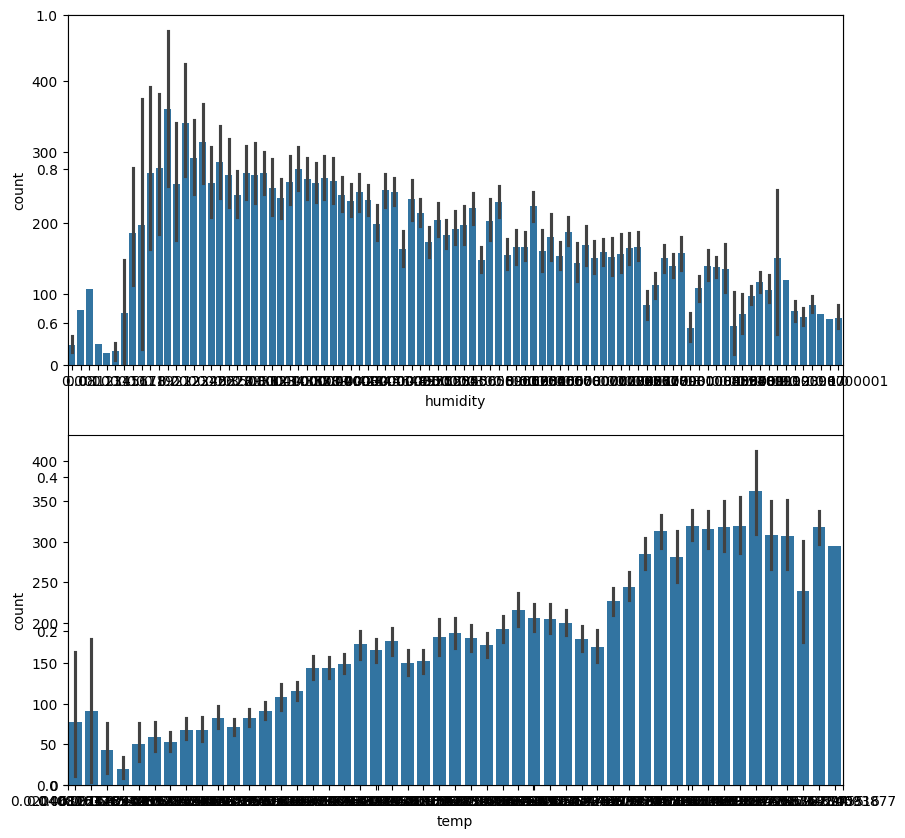

In [ ]:
fig ,ax = plt.subplots(figsize=(10,10))

plt.subplot(2,1,1)
sns.barplot(train,x='humidity',y='count')
plt.subplot(2,1,2)
sns.barplot(train,x='temp',y='count')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(train.drop('count',axis=1),target)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf.predict(x_test)

In [ ]:
root_mean_squared_error(y_test,y_pred_rf)

17.18369396563626

In [ ]:
mean_squared_error(y_test,y_pred_rf)

295.279338304644

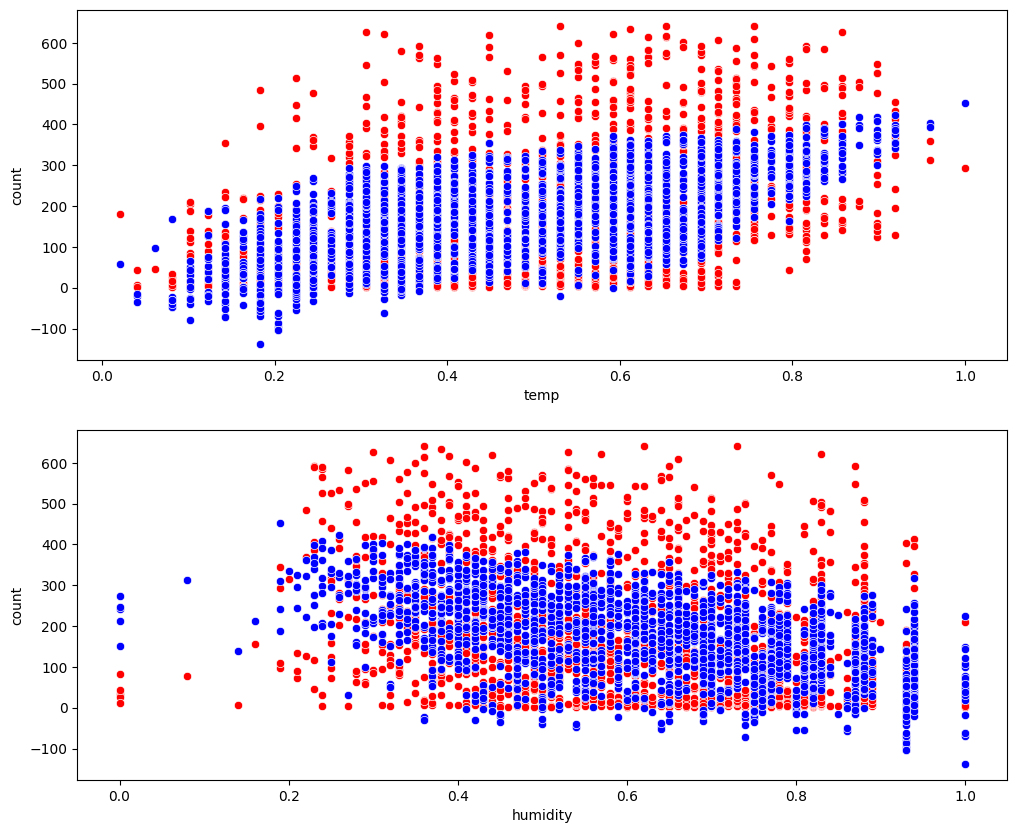

In [314]:
import seaborn as sns

fig = plt.figure(figsize=[12,10])
# X: temp, y: count
ax01 = fig.add_subplot(2,1,1)
ax01 = sns.scatterplot(x=x_test['temp'], y=y_test, color='r')
ax01 = sns.scatterplot(x=x_test['temp'], y=y_pred, color='b')
# X: humidity, y: count
ax02 = fig.add_subplot(2,1,2)
ax01 = sns.scatterplot(x=x_test['humidity'], y=y_test, color='r')
ax02 = sns.scatterplot(x=x_test['humidity'], y=y_pred, color='b')